In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Machine_Learning_Dataset/1-studyhours.csv")

In [4]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [6]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


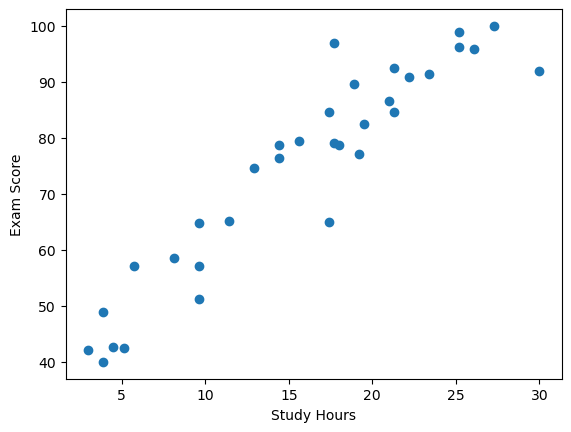

In [7]:
plt.scatter(df["Study Hours"],df["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [8]:
# independent and dependent features 
# X bagimsiz independent 
# y bagimli dependent 

In [14]:
# X = df["Study Hours"] # X i yani bagimsiz degiskenlerimizi bu sekilde yazamayiz cunku bizden dataframe ister.
# bu sekilde yazinca bize series dönduruyor. birden cok stun olsa sikinti olmaz. ama tek sutunda asagidaki gibi yazman lazim.
X = df[["Study Hours"]]
y = df["Exam Score"]

In [15]:
type(X)

pandas.core.frame.DataFrame

In [16]:
type(y)

pandas.core.series.Series

In [18]:
# train - test split
# datasetinin bir kismini train icin bir kismini da test icin kullanmak icin dataseti böleriz.
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=15)
# %80 i train'e %20 yi test kismi icin verileri ayirdik

In [24]:
# standardize the data set
# veriler arasindaki buyukluk farkini sıkıstırarak belli bir araliga getirir.

In [23]:
 from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# fit -> formulun uygulanmasi demek transform ise kucultulmus/sıkıstırılmıs haline getirilmesi demek
# X_test te de data leakage olmasin diye fit_transform demiyoruz. X_train, X_test ile ilgili hic bir seyi bilmemesi gerekiyor
# bu yuzden X_teste fit yapmayiz. sadece transform yapariz.

In [27]:
X_train

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [28]:
X_test

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
regression = LinearRegression()
# n_jobs -> tum cpu lari kullanmayi saglar yapilan islemi hizlandirir

In [34]:
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
print("Coefficent: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficent:  [16.17860223]
Intercept:  76.9076923076923


In [38]:
# y = 76.91 + 16.18 x -> bu bizim denklemimizi veriyor. 
# burada x e verilecek olan degerler 1,2,3,4... gibi degerler degil biz x i yukarida scaler ettigimiz icin 
# burada x e verilecek degerler scaler edilmis degerler olur. 
# yani x = 1 saat ders calistim -> sinavdan 76.91 + 16.18 = 93.09 aldim ifadesi yanlistir. 
# burada x = 1 in scaler edilmis degeri x degiskeni yerine yazilir.

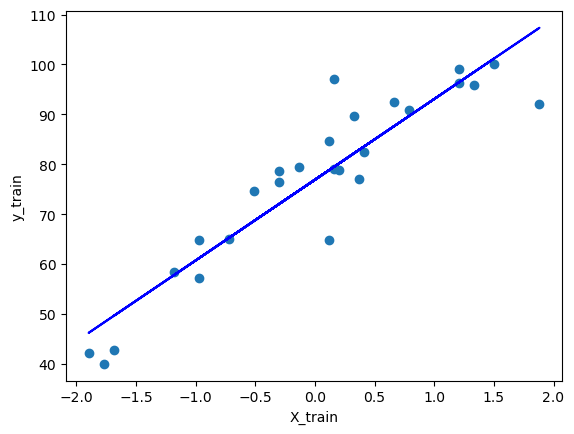

In [55]:
plt.scatter(X_train, y_train)
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.plot(X_train,regression.predict(X_train),"b")
plt.show()

In [56]:
scaler.transform([[20]]) # 20 saat calisan bir kisinin (yani x = 20) scaler edeilmis degerini buluruz.

C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [57]:
regression.predict(scaler.transform([[20]])) 
# 20 saat calisan kisinin sonucunu tahmin eder. yani olusturdugumuz modele/fonksiyona scaler edilmis x'i koyar.

C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [58]:
regression.predict(scaler.transform([[25]])) 

C:\Users\omerf\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([96.0329235])

In [63]:
y_predict_test = regression.predict(X_test) 
# modelin tahmin ettigi test degerleri

In [64]:
y_test # asil test degerlerimiz.

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [65]:
y_predict_test

array([50.95139904, 86.97131054, 92.40827832, 52.31064098, 61.14571361,
       48.23291515, 87.65093152])

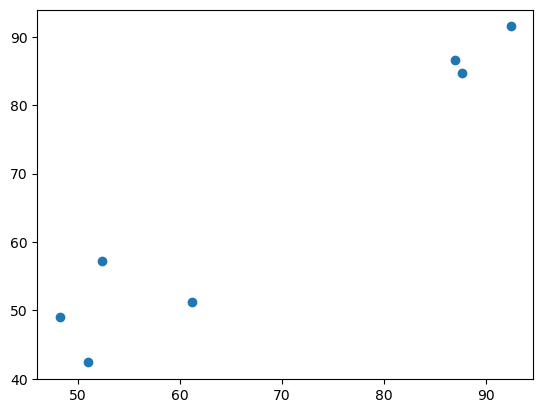

In [66]:
plt.scatter(y_predict_test, y_test)
plt.show()

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [68]:
mse = mean_squared_error(y_test, y_predict_test)
mae = mean_absolute_error(y_test, y_predict_test)
rmse = np.sqrt(mse)
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)
# kiyaslama icin kullanilabilir, kiyaslarken bakilir

mse:  29.45839048833392
mae:  4.054868128856142
rmse:  5.427558427906043


In [71]:
r2 = r2_score(y_test, y_predict_test)
print("r2 score: ", r2)
# tek basina modelin gucu icin bakilir. 

r2 score:  0.9196596206825491


In [73]:
1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
# bu ise adjusted r2 score verir. bu ifadeyi yeni feature ekledigimizde bakariz. 
# ekledigimiz fature bos mu yoksa model icin faydali mi diye bakilir

0.903591544819059